# Trabajo Práctico 1
## Análisis Exploratorio

### Richter's Predictor: Modeling Earthquake Damage

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_types = {
    'height_percentage':'category',
    'land_surface_condition':'category',
    'foundation_type':'category',
    'roof_type':'category',
    'ground_floor_type':'category',
    'other_floor_type':'category',
    'position':'category',
    'plan_configuration':'category',
    'has_superstructure_adobe_mud':bool,
    'has_superstructure_mud_mortar_stone':bool,
    'has_superstructure_stone_flag':bool,
    'has_superstructure_cement_mortar_stone':bool,
    'has_superstructure_mud_mortar_brick':bool,
    'has_superstructure_cement_mortar_brick':bool,
    'has_superstructure_timber':bool,
    'has_superstructure_bamboo':bool,
    'has_superstructure_rc_non_engineered':bool,
    'has_superstructure_rc_engineered':bool,
    'has_superstructure_other':bool,
    'legal_ownership_status':'category',
    'count_families':'category',
    'has_secondary_use':bool,
    'has_secondary_use_agriculture':bool,
    'has_secondary_use_hotel':bool,
    'has_secondary_use_rental':bool,
    'has_secondary_use_institution':bool,
    'has_secondary_use_school':bool,
    'has_secondary_use_industry':bool,
    'has_secondary_use_health_post':bool,
    'has_secondary_use_gov_office':bool,
    'has_secondary_use_use_police':bool,
    'has_secondary_use_other':bool
    
}

In [3]:
labels = pd.read_csv("/home/mauricio/Documents/Datos/Tp1RichterPredictor/train_labels.csv",
                    dtype = {'damage_grade':'category'})
values = pd.read_csv("/home/mauricio/Documents/Datos/Tp1RichterPredictor/train_values.csv"\
                    ,dtype = data_types)

In [4]:
labels.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [5]:
values.tail(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
260596,688636,25,1335,1621,1,55,6,3,n,r,...,False,False,False,False,False,False,False,False,False,False
260597,669485,17,715,2060,2,0,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
260598,602512,17,51,8163,3,55,6,7,t,r,...,False,False,False,False,False,False,False,False,False,False
260599,151409,26,39,1851,2,10,14,6,t,r,...,False,False,False,False,False,False,False,False,False,False
260600,747594,21,9,9101,3,10,7,6,n,r,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#damage_grade entre 1 y 3
labels.damage_grade.describe()

count     260601
unique         3
top            2
freq      148259
Name: damage_grade, dtype: object

In [7]:
values.describe()
#promedio de pisos 2, máx cantidad de pisos 9
#edificios viejos, edad 995 años

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000


In [8]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   building_id   260601 non-null  int64   
 1   damage_grade  260601 non-null  category
dtypes: category(1), int64(1)
memory usage: 2.2 MB


In [9]:
values.shape
#veo que no hay datos nulos (nans)

(260601, 39)

In [10]:
#veo los tipos de datos y si conviene parsearlos
#había muchos datos binarios como int64
#también datos category que eran objects
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  category
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [11]:
values.land_surface_condition.drop_duplicates()

0    t
1    o
6    n
Name: land_surface_condition, dtype: category
Categories (3, object): ['n', 'o', 't']

In [12]:
values.foundation_type.drop_duplicates()

0     r
7     w
9     i
11    u
34    h
Name: foundation_type, dtype: category
Categories (5, object): ['h', 'i', 'r', 'u', 'w']

In [13]:
values.has_secondary_use_gov_office.drop_duplicates()

0        False
27243     True
Name: has_secondary_use_gov_office, dtype: bool

In [14]:
values.columns.to_list()

['building_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_of

In [15]:
values.size

10163439

In [16]:
values.index

RangeIndex(start=0, stop=260601, step=1)

## Cantidad de Pisos por Edificio %

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [18]:
cant_pisos_por_ed = values.loc[:,["count_floors_pre_eq"]]\
.value_counts(normalize=True)

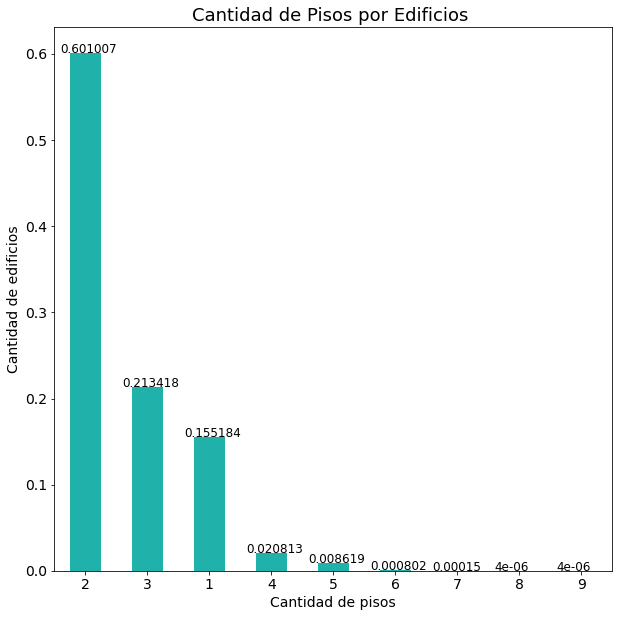

In [19]:
ax = cant_pisos_por_ed.plot.bar(color='lightseagreen',rot=0,figsize=(10,10),fontsize=14)
ax.set_ylabel('Cantidad de edificios',fontsize=14)
ax.set_xlabel('Cantidad de pisos',fontsize=14)
ax.set_title('Cantidad de Pisos por Edificios ',fontsize=18)
#ax.set_facecolor("lightgreen")

bar_labels = cant_pisos_por_ed.values
for index, bar in enumerate(bar_labels):
    ax.text(index-0.4, bar, str(round(bar,6)),fontsize=12)
    
x_labels = values.count_floors_pre_eq.drop_duplicates().values
ax.set_xticklabels(x_labels)
plt.show()

## Tipo de Daño segun Cantidad de Pisos

In [20]:
daño_cant_pisos = values.loc[:,["building_id","count_floors_pre_eq"]]\
.merge(labels,on="building_id",how='inner')\
.loc[:,["damage_grade","count_floors_pre_eq"]]
#daño_cant_pisos = pd.pivot_table(daño_cant_pisos,index="count_floors_pre_eq",columns="damage_grade",aggfunc='count')
daño_cant_pisos['aux'] = 1
daño_cant_pisos = daño_cant_pisos.pivot_table(index='count_floors_pre_eq'\
                        ,columns='damage_grade',values='aux',aggfunc='count')


# twilight_r,mako,blues,greens

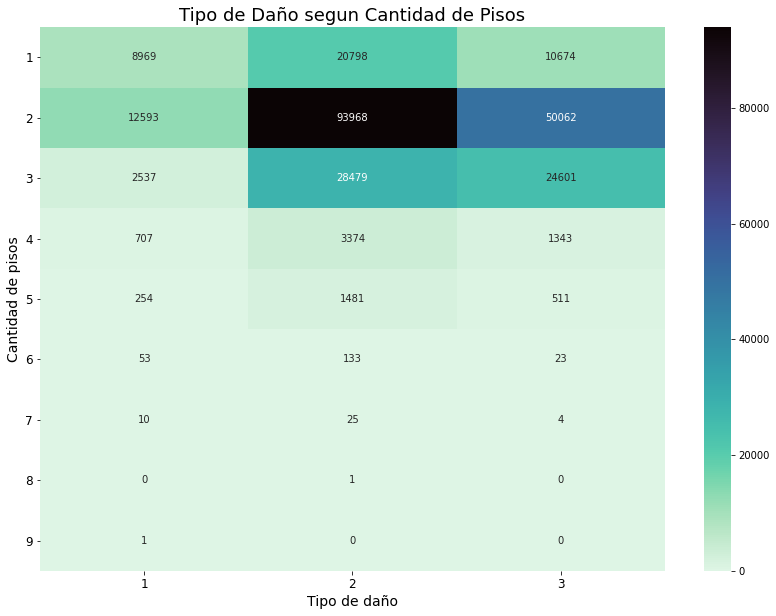

In [21]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(daño_cant_pisos,annot=True,cmap='mako_r',fmt='d')
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Cantidad de pisos',fontsize=14)
ax.set_xlabel('Tipo de daño',fontsize=14)
ax.set_title('Tipo de Daño segun Cantidad de Pisos',fontsize=18)

y_labels = daño_cant_pisos.index
x_labels = daño_cant_pisos.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)

## Top Usos Construcciones

In [22]:
has_columns = ['has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [23]:
tizzi = values.loc[:,has_columns].sum()
tizzi = tizzi.to_frame().rename(columns={0:"Amount"}) 

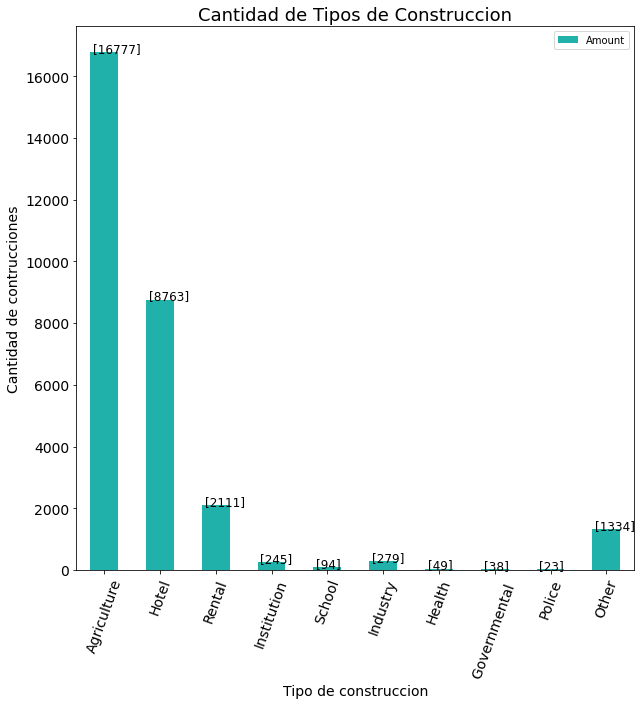

In [24]:
ax = tizzi.plot.bar(color='lightseagreen',rot=70,figsize=(10,10),fontsize=14)
ax.set_ylabel('Cantidad de contrucciones',fontsize=14)
ax.set_xlabel('Tipo de construccion',fontsize=14)
ax.set_title('Cantidad de Tipos de Construccion',fontsize=18)
#ax.set_facecolor("lightgreen")

bar_labels = tizzi.values
for index, bar in enumerate(bar_labels):
    ax.text(index-0.2, bar, str(bar),fontsize=12)
    
x_labels = ['Agriculture',
 'Hotel',
 'Rental',
 'Institution',
 'School',
 'Industry',
 'Health',
 'Governmental ',
 'Police',
 'Other']
ax.set_xticklabels(x_labels)
plt.show()

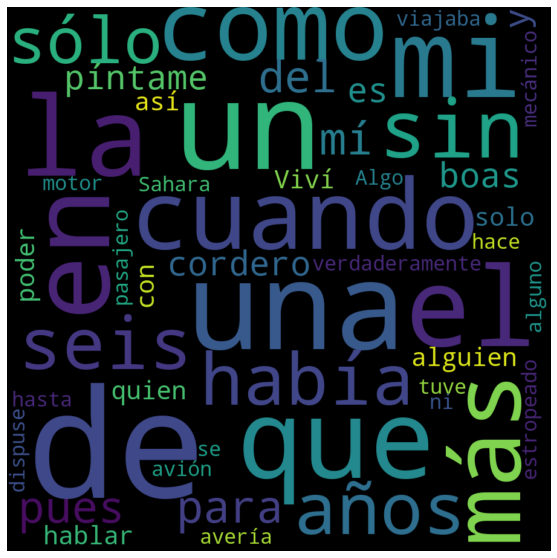

In [25]:
from wordcloud import WordCloud

text = ''
for i in range(len(tizzi.Amount)):
    for j in range (tizzi.Amount[i]):
        text+=x_labels[i]+" "
        
text2 = 'Viví   así,   solo,   sin   alguien   con   quien   poder   hablar   verdaderamente,  hasta  hace  seis  años  cuando  tuve  una  avería en el Sahara. Algo se había estropeado en el motor de   mi   avión.   Como   viajaba   sin   mecánico   ni   pasajero   alguno,  me  dispuse  a  realizar  yo  sólo,  una  reparación  difícil.  Era  para  mí  una  cuestión  de  vida  o  muerte  pues  apenas tenía agua pura como para ocho díasLa  primera  noche  me  dormí  sobre  la  arena,  a  unas  mil  millas   de   distancia   del   lugar   habitado   más   próximo.   Estaba más aislado que un náufrago en medio del océano. Imagínense,  pues,  mi  sorpresa  cuando  al  amanecer  me  despertó una vocecita que decía:  –¡Por favor... píntame un cordero!–¿Eh?–¡Píntame un cordero!Me puse en pie de un brinco y frotándome los ojos miré a mí  alrededor.  Descubrí  a  un  extraordinario  muchachito  que me observaba gravemente. Ahí tienen el mejor retratoque más tarde logré hacer de él, aunque reconozco que mi dibujo no es tan encantador como el original. La culpa no es  mía,  las  personas  mayores  me  desanimaron  de  mi  carrera de pintor a la edad de seis años, cuando sólo había aprendido a dibujar boas cerradas y boas abiertas. '

# Create the wordcloud object
wordcloud = WordCloud(width=900, height=900,max_words=50,margin=0,min_font_size=20,max_font_size=250).generate(text2)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


## 

# Material más afectado por terremotos

In [26]:
['foundation_type',
 'roof_type',
 'ground_floor_type']

['foundation_type', 'roof_type', 'ground_floor_type']

## Foundation

In [27]:
foundation_type = values.loc[:,['building_id','foundation_type']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='foundation_type',columns='damage_grade',values='building_id',aggfunc='count')


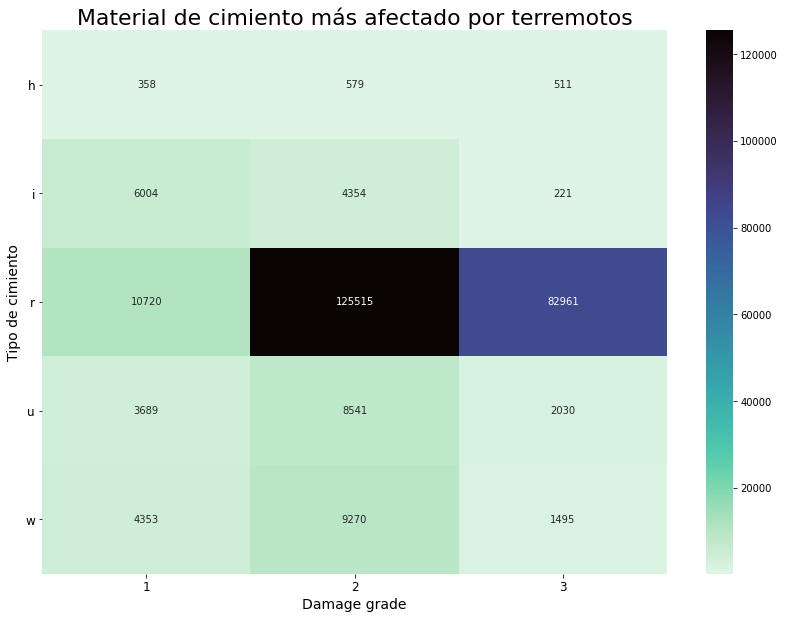

In [28]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(foundation_type,cmap='mako_r',annot=True,fmt='d')
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Tipo de cimiento',fontsize=14)
ax.set_xlabel('Damage grade',fontsize=14)
ax.set_title('Material de cimiento más afectado por terremotos',fontsize=22)

y_labels = foundation_type.index
x_labels = foundation_type.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)


## Roof

In [29]:
roof_type = values.loc[:,['building_id','roof_type']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='roof_type',columns='damage_grade',values='building_id',aggfunc='count')


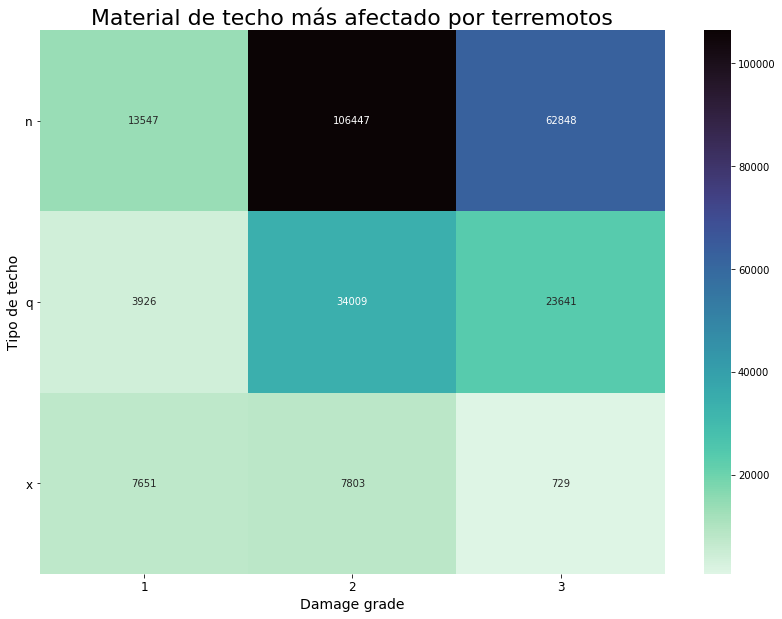

In [30]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(roof_type,cmap='mako_r',annot=True,fmt='d')
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Tipo de techo',fontsize=14)
ax.set_xlabel('Damage grade',fontsize=14)
ax.set_title('Material de techo más afectado por terremotos',fontsize=22)

y_labels = roof_type.index
x_labels = roof_type.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)


## Ground

In [31]:
ground_type = values.loc[:,['building_id','ground_floor_type']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='ground_floor_type',columns='damage_grade',values='building_id',aggfunc='count')


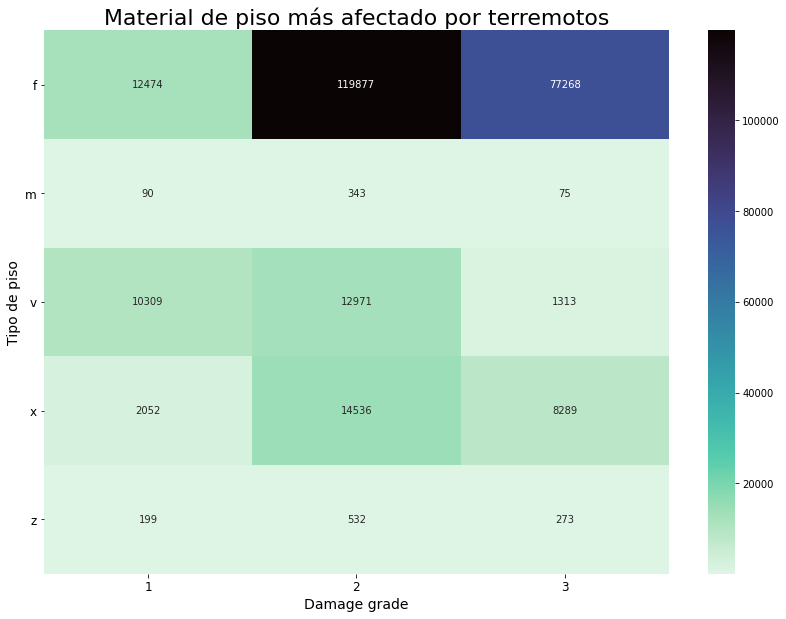

In [32]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(ground_type,cmap='mako_r',annot=True,fmt='d')
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Tipo de piso',fontsize=14)
ax.set_xlabel('Damage grade',fontsize=14)
ax.set_title('Material de piso más afectado por terremotos',fontsize=22)

y_labels = ground_type.index
x_labels = ground_type.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)


## ScatterPlot Matrix

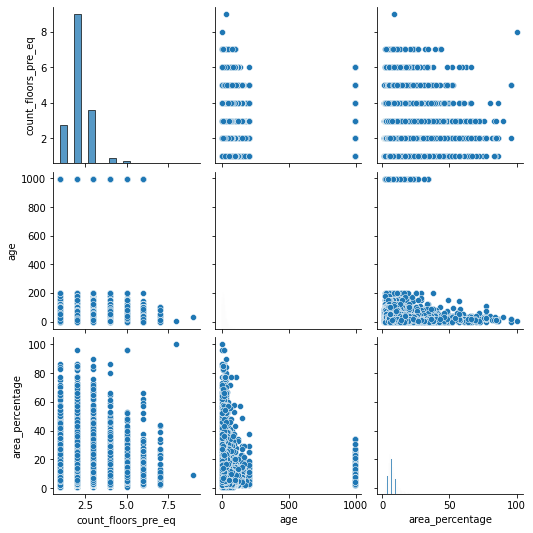

In [88]:
#esto sirve como analisis exploratorio para ver como se relacionan las variables entre si rápidamente
matrix = values.merge(labels,on='building_id',how='inner')\
.loc[:,['building_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage']]\
.set_index('building_id')

p = sns.pairplot(matrix)

## Antigüedad según material

### Foundation

In [46]:
foundation_type = values.loc[:,['age','foundation_type']]
foundation_type

,age,foundation_type
0,30,r
1,10,r
2,10,r
3,10,r
4,30,r
...,...,...
260596,55,r
260597,0,r
260598,55,r
260599,10,r


Text(0.5, 1.0, 'Antigüedad segun tipo de cimiento')

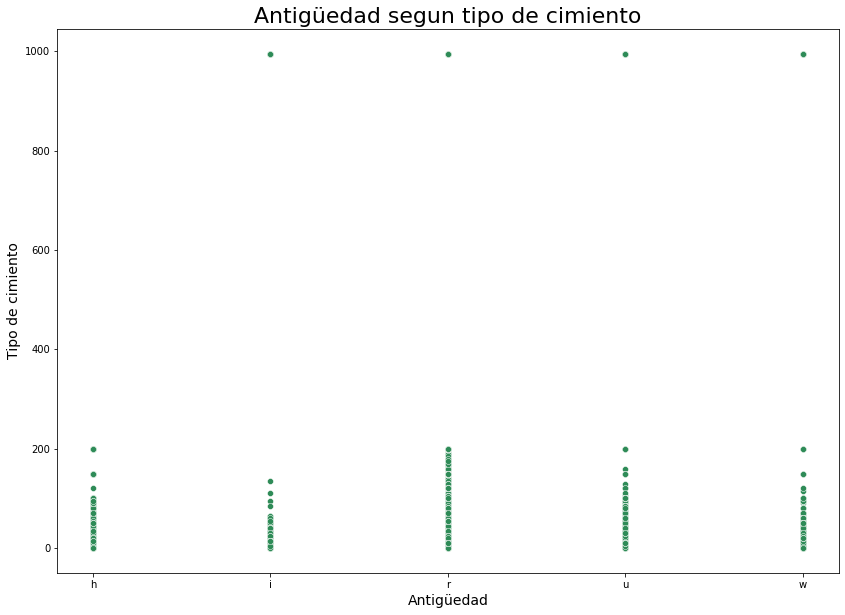

In [89]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=foundation_type, x=foundation_type.foundation_type, y=foundation_type.age,color='seagreen')
ax.set_ylabel('Tipo de cimiento',fontsize=14)
ax.set_xlabel('Antigüedad',fontsize=14)
ax.set_title('Antigüedad segun tipo de cimiento',fontsize=22)

### Roof

In [52]:
roof_type = values.loc[:,['age','roof_type']]
roof_type

,age,roof_type
0,30,n
1,10,n
2,10,n
3,10,n
4,30,n
...,...,...
260596,55,n
260597,0,n
260598,55,q
260599,10,x


Text(0.5, 1.0, 'Antigüedad segun tipo de techo')

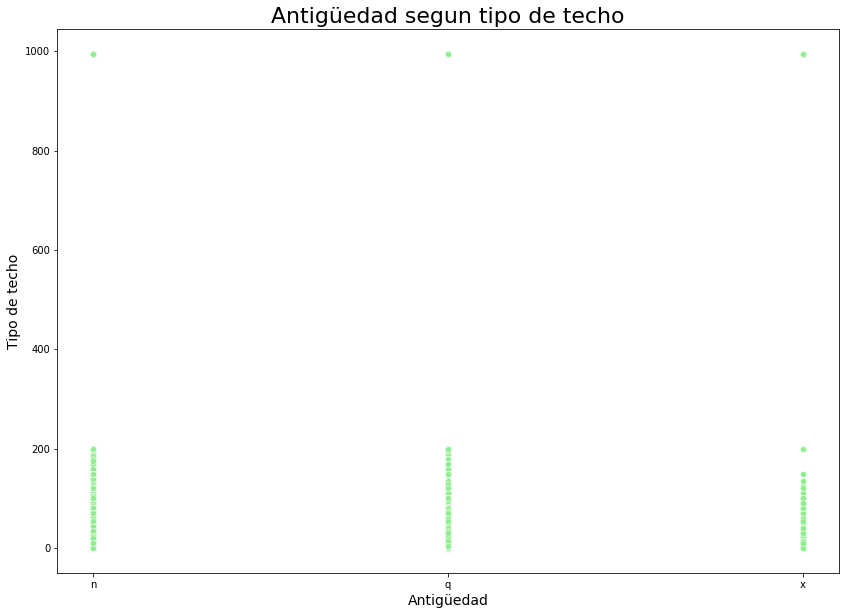

In [85]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=roof_type, x=roof_type.roof_type, y=roof_type.age,color='lightgreen')
ax.set_ylabel('Tipo de techo',fontsize=14)
ax.set_xlabel('Antigüedad',fontsize=14)
ax.set_title('Antigüedad segun tipo de techo',fontsize=22)

### Ground

In [54]:
ground_type = values.loc[:,['age','ground_floor_type']]
ground_type

,age,ground_floor_type
0,30,f
1,10,x
2,10,f
3,10,f
4,30,f
...,...,...
260596,55,f
260597,0,f
260598,55,f
260599,10,v


Text(0.5, 1.0, 'Antigüedad segun tipo de suelo')

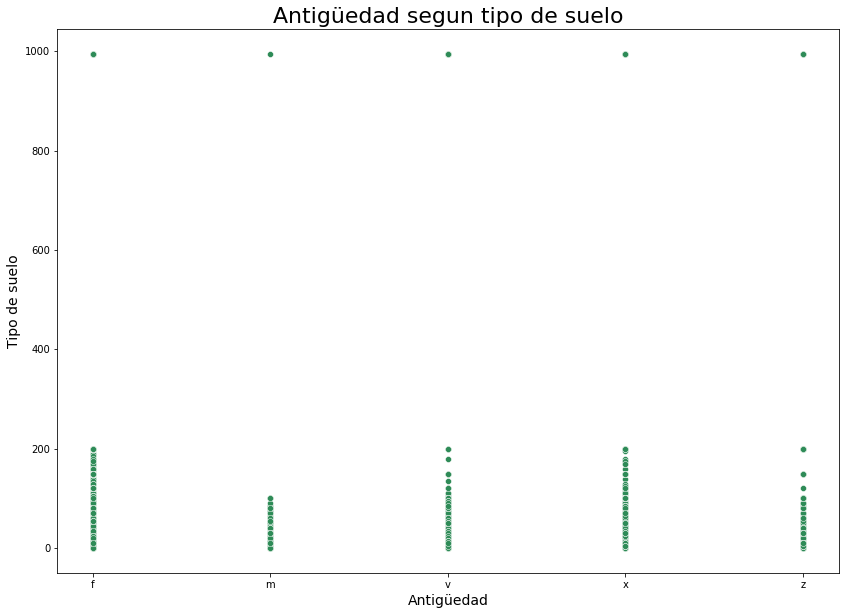

In [90]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=ground_type, x=ground_type.ground_floor_type, y=ground_type.age,color='seagreen')
ax.set_ylabel('Tipo de suelo',fontsize=14)
ax.set_xlabel('Antigüedad',fontsize=14)
ax.set_title('Antigüedad segun tipo de suelo',fontsize=22)

## Cantidad de daño según antigüedad

In [60]:
age_damage = values.loc[:,['building_id','age']].merge(labels,on='building_id',how='inner')
age_damage = age_damage.loc[:,['damage_grade','age']]
age_damage

,damage_grade,age
0,3,30
1,2,10
2,3,10
3,2,10
4,3,30
...,...,...
260596,2,55
260597,3,0
260598,3,55
260599,2,10


Text(0.5, 1.0, 'Tipo de daño segun Antigüedad')

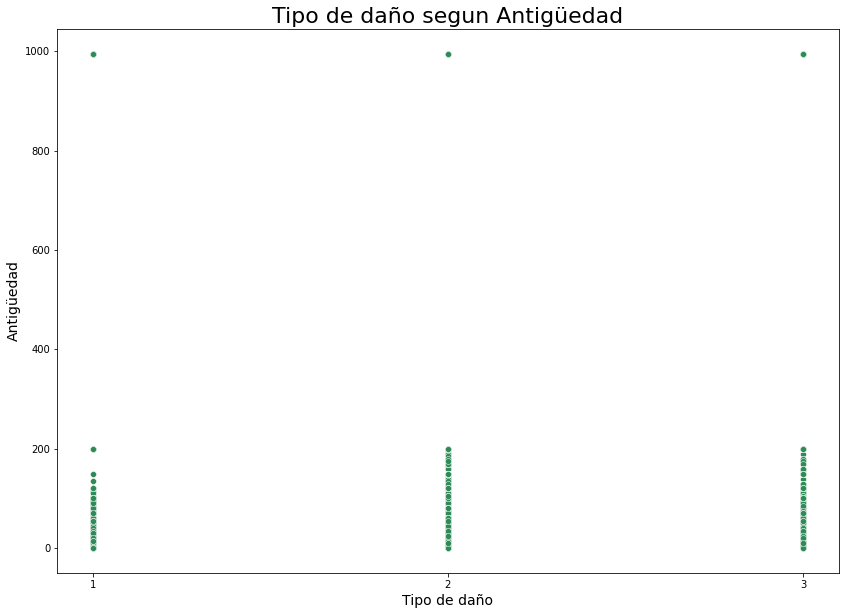

In [91]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=age_damage, x=age_damage.damage_grade, y=age_damage.age,color="seagreen")
ax.set_ylabel('Antigüedad',fontsize=14)
ax.set_xlabel('Tipo de daño',fontsize=14)
ax.set_title('Tipo de daño segun Antigüedad',fontsize=22)

## Cantidad de daño según orientación

In [92]:
#notablemente la orinetacion 'o' recibió menos daños y la orientacion 's' muchisimos
orientation_damage = values.loc[:,['building_id','position']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='damage_grade',columns='position',values='building_id',aggfunc='count')
orientation_damage

position,j,o,s,t
damage_grade,,,,
1,1675,120,19867,3462
2,7899,1609,116051,22700
3,3708,604,66172,16734


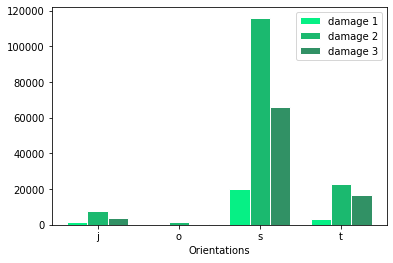

In [82]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = orientation_damage.iloc[0]
bars2 = orientation_damage.iloc[1]
bars3 = orientation_damage.iloc[2]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='#06f085', width=barWidth, edgecolor='white', label='damage 1')
plt.bar(r2, bars2, color='#1bb96f', width=barWidth, edgecolor='white', label='damage 2')
plt.bar(r3, bars3, color='#319165', width=barWidth, edgecolor='white', label='damage 3')

# Add xticks on the middle of the group bars
plt.xlabel('Orientations')
plt.xticks([r + barWidth for r in range(len(bars1))], ['j', 'o', 's', 't'])
 
# Create legend & Show graphic
plt.legend()

plt.show()